In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [123]:
turbine_df=pd.read_csv("energy_production.csv",sep=";")
turbine_df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [186]:
turbine_df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [109]:
turbine_df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### ***Checking for Corelation between estimaters***

In [110]:
turbine_df.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


#### ***Corelation between Temperature and Energy Production***

<Axes: xlabel='temperature', ylabel='energy_production'>

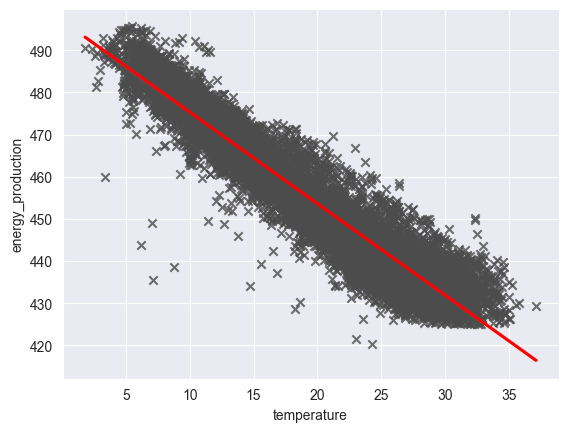

In [111]:

sns.regplot(
    data=turbine_df, x='temperature', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

#### ***Corelation between r_humidity and Energy Production***

<Axes: xlabel='r_humidity', ylabel='energy_production'>

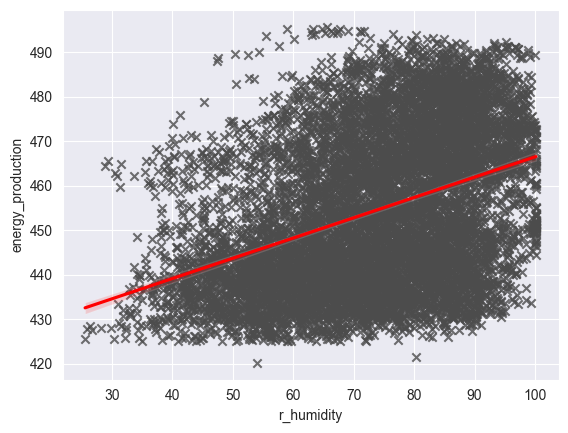

In [112]:

sns.regplot(
    data=turbine_df, x='r_humidity', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

#### ***Corelation between exhaust_vacuum and Energy Production***

<Axes: xlabel='exhaust_vacuum', ylabel='energy_production'>

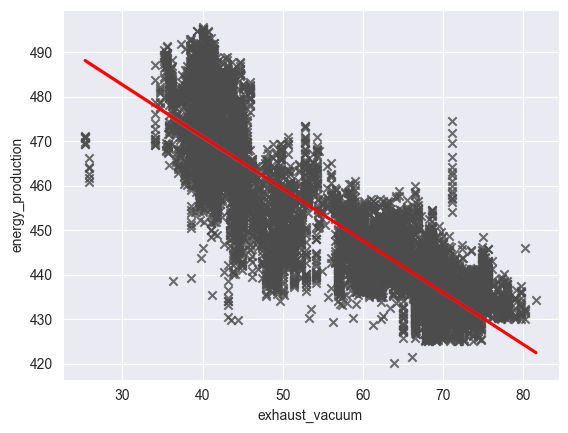

In [113]:
sns.regplot(
    data=turbine_df, x='exhaust_vacuum', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

#### ***Corelation between amb_pressure and Energy Production***

<Axes: xlabel='amb_pressure', ylabel='energy_production'>

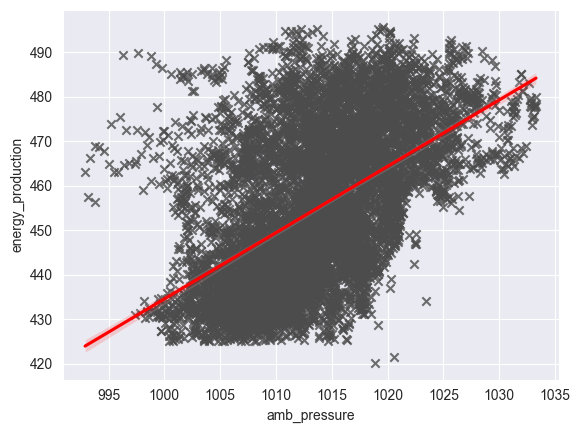

In [114]:
sns.regplot(
    data=turbine_df, x='amb_pressure', y='energy_production',
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),)

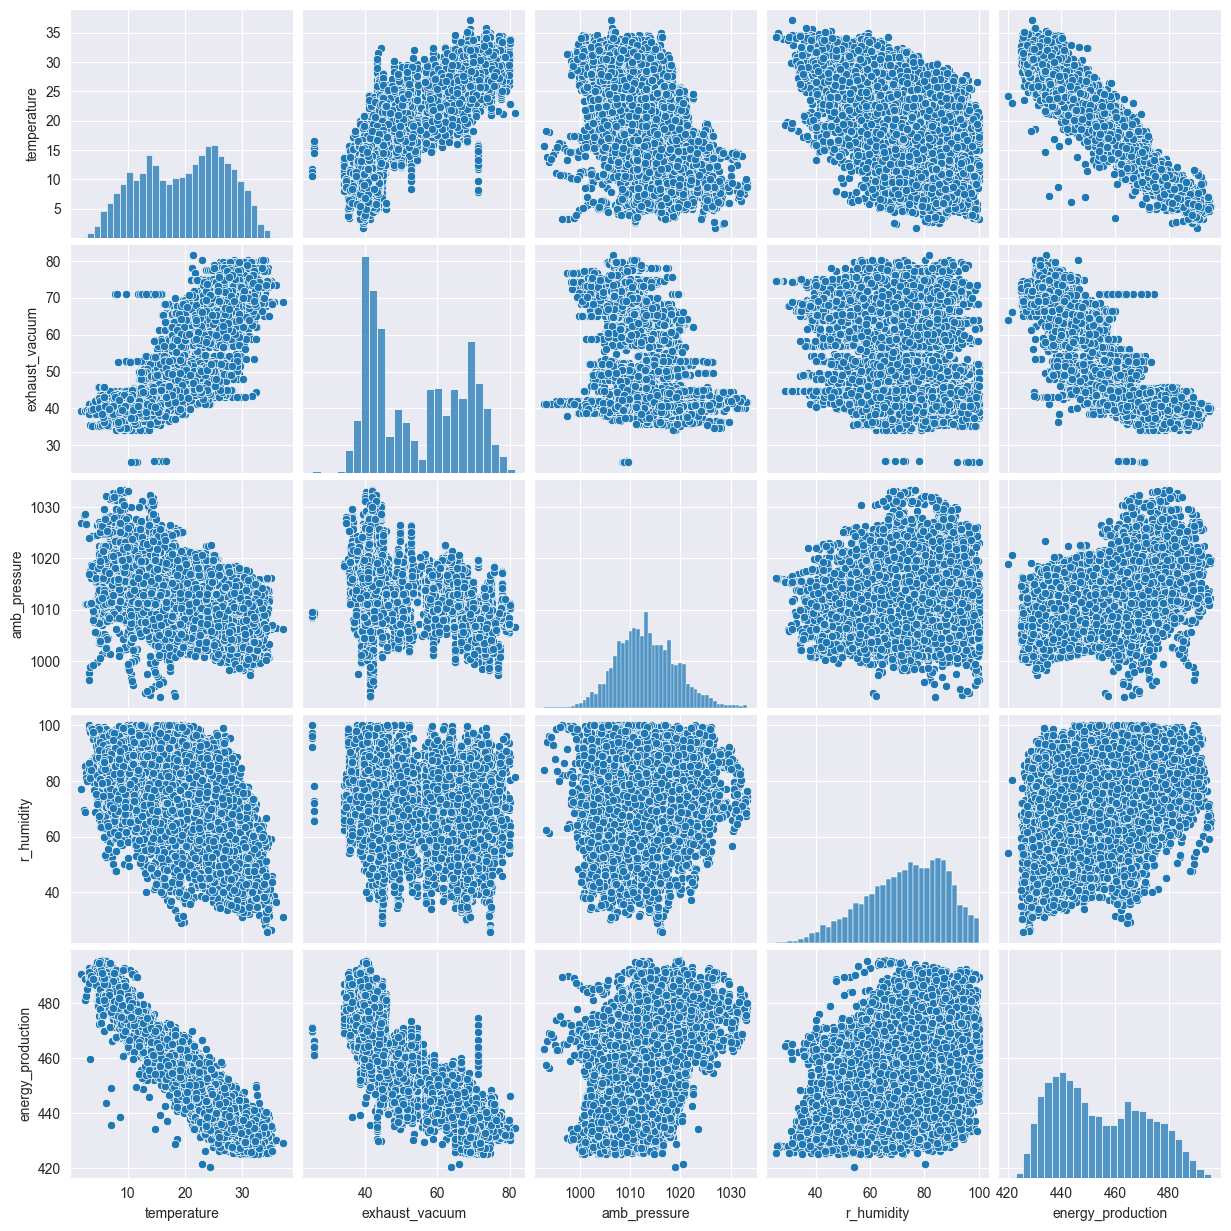

In [115]:
#Format the plot background and scatter plots for all the variables
sns.pairplot(turbine_df)

### ***Feature Selection***

In [194]:
# Independant and Dependant Features
X=turbine_df.iloc[:,0:-1] # Independant Feature
y=turbine_df.iloc[:,-1] #Dependant Feature--> Series or 1D array

## **Train Test Split**

In [196]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [175]:
# Standardization (All data points with mean=0 and Standard Deviation 1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [198]:
scaler.fit_transform(X_train)

array([[ 1.02841826,  1.08258703, -1.25035147, -1.55673359],
       [-1.93050777, -1.1032352 , -0.39413494,  0.56104276],
       [ 0.73292678,  1.21983815,  0.37327635,  0.84683976],
       ...,
       [ 0.33448125, -0.38796076,  1.10717623, -0.04276338],
       [ 0.61259088,  0.78377172, -0.34219226,  0.73855217],
       [-1.95992321, -1.17146862, -1.61059913,  1.28615842]])

In [197]:
scaler.fit_transform(X_test)

array([[ 1.79350824,  1.09454954, -1.31589834, -1.8864044 ],
       [ 0.00646311, -1.18032746,  0.0350475 , -0.92812824],
       [ 0.30067176,  0.38120684,  0.0970017 , -0.78175343],
       ...,
       [ 0.0663945 ,  0.28545614,  0.53928588,  0.20730248],
       [-0.20465884,  0.47217   , -0.65505349,  0.89334887],
       [-1.25209612, -1.00877412,  1.10375752,  0.07871153]])

## **Linear Regreaaion**

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import cross_val_score

lgr=LinearRegression()
regress=lgr.fit(X_train,y_train)


In [200]:
print('Coefiicient or Slope',regress.coef_)
print('Intercept',regress.intercept_)

Coefiicient or Slope [-1.99085651 -0.2310534   0.05992458 -0.15927784]
Intercept 457.01002245118167


In [204]:
# cross Validation
validation_score=cross_val_score(regress,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
print('validation_Score -->',np.mean(validation_score))

validation_Score --> -20.44116082404296


In [181]:
y_pred=regress.predict(X_test)
y_pred

array([428.80831535, 459.75461068, 450.61336386, ..., 452.1657498 ,
       453.57345604, 475.68092194])

In [206]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse= mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

22.16847142304462
3.6875283714834657
4.708340623090541


In [207]:
# Coefficient of Determination
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9198969303303213


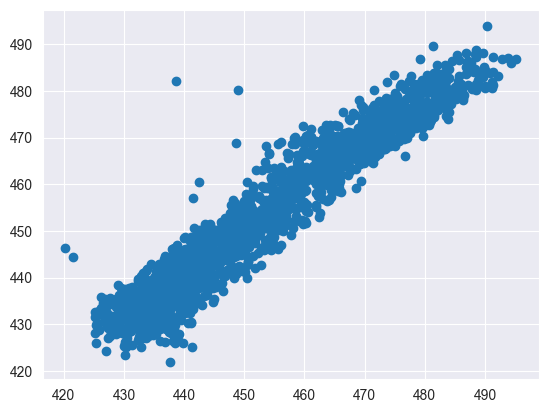

In [208]:
plt.scatter(y_test,y_pred)

In [209]:
residuals=y_test-y_pred
print(residuals)

5925   -2.918315
4294    3.965389
7120    2.766636
6688    4.359645
7322   -0.430789
          ...   
6304    1.928900
2212    0.737109
5371   -1.455750
3900   -0.643456
7911    1.369078
Name: energy_production, Length: 1914, dtype: float64


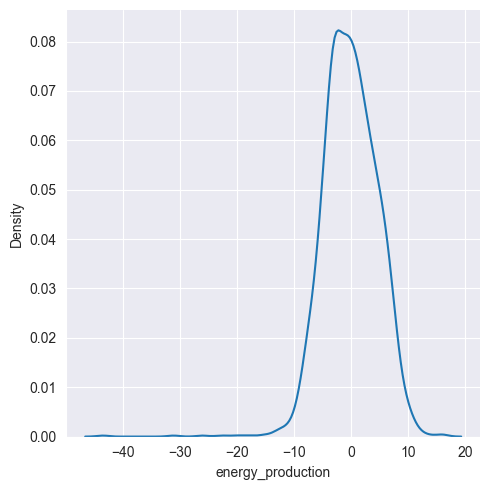

In [212]:
sns.displot(residuals,kind='kde')

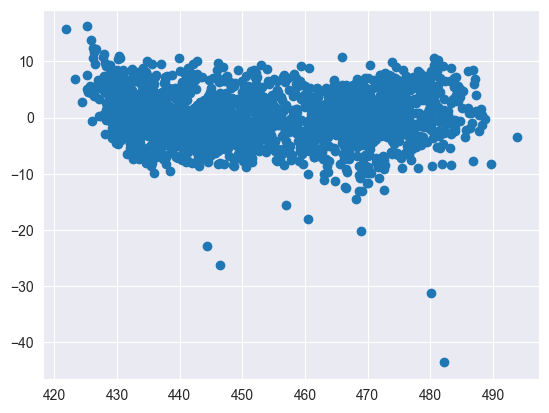

In [213]:
# Scater Plot with respect to residuals and Prediction
plt.scatter(y_pred,residuals)

##### ***Residual Plot***

<StemContainer object of 3 artists>

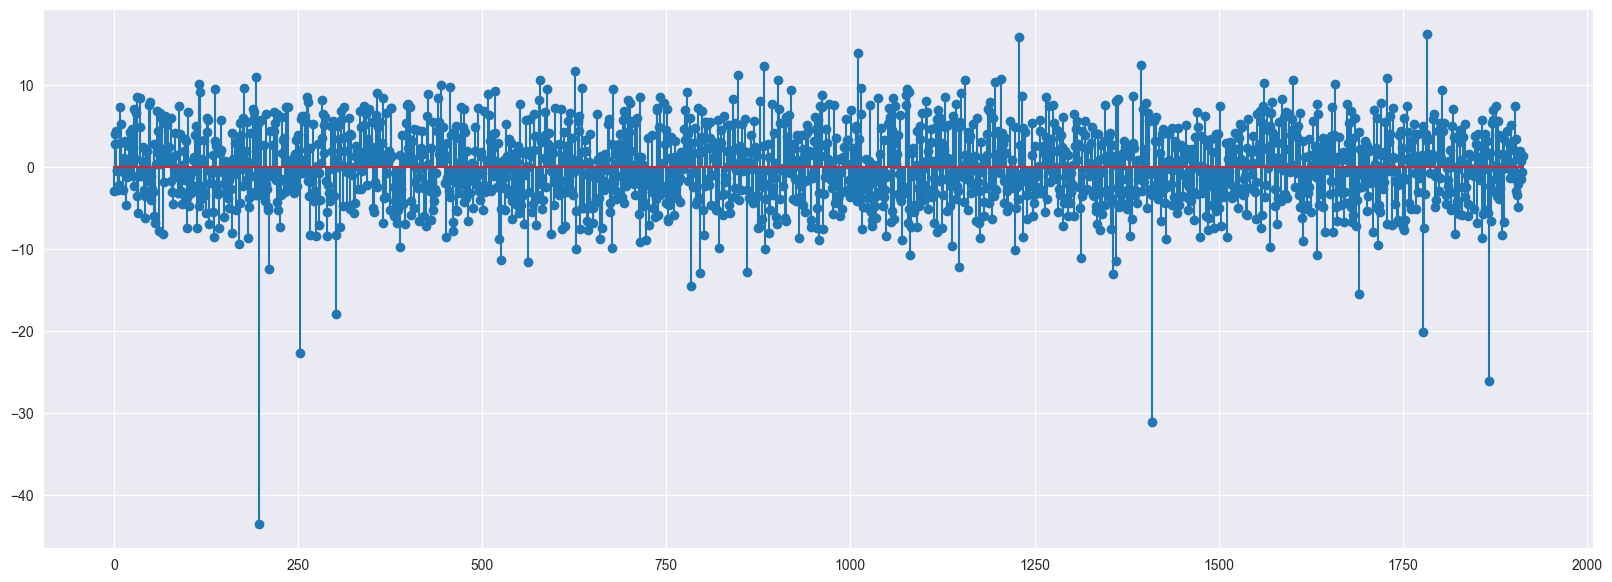

In [217]:
from statsmodels.graphics.regressionplots import influence_plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(y_test)),np.round(residuals,3))